## Exploring Mental Health Data

### 1. Introduction

# 🎯 A Kaggle Competition (Playground Series - S4E11) 📊
# This competition aims to analyze mental health survey data to predict depression levels using machine learning techniques.

In [1]:
### 2. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
### 3. Import Datasets and Understand Data

train_df = pd.read_csv("train_MH.csv")
test_df = pd.read_csv("test_MH.csv")

print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("Train Data Info:")
print(train_df.info())
print("Train Data Sample:")
print(train_df.head())

Train Data Shape: (140700, 20)
Test Data Shape: (93800, 19)
Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non

In [3]:
### 4. Data Cleaning

# Drop unnecessary columns
train_df = train_df.drop(columns=["Name", "City", "Profession"])
test_df = test_df.drop(columns=["Name", "City", "Profession"])

# Separate features and target in training data
X_train = train_df.drop(columns=["Depression"])
y_train = train_df["Depression"]

# Apply Imputer only on features
imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
test_df = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

# Reattach target variable to training data
train_df = X_train.copy()
train_df["Depression"] = y_train

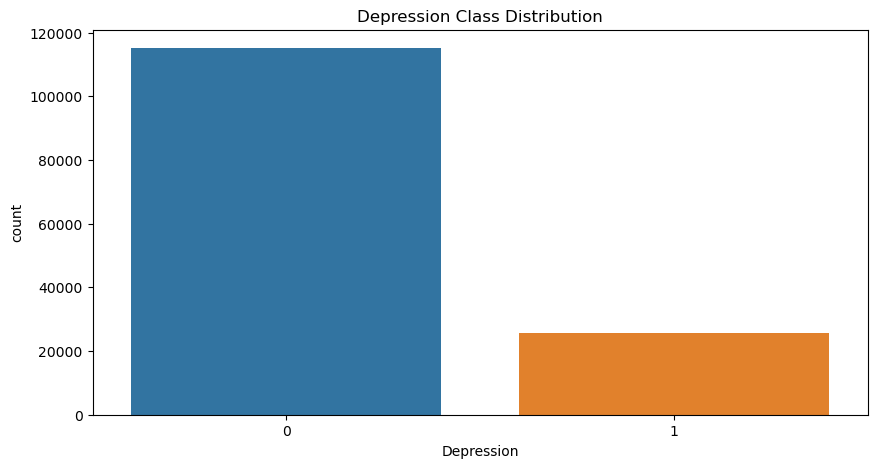

In [4]:
### 5. Exploratory Data Analysis (EDA)

plt.figure(figsize=(10,5))
sns.countplot(x='Depression', data=train_df)
plt.title("Depression Class Distribution")
plt.show()

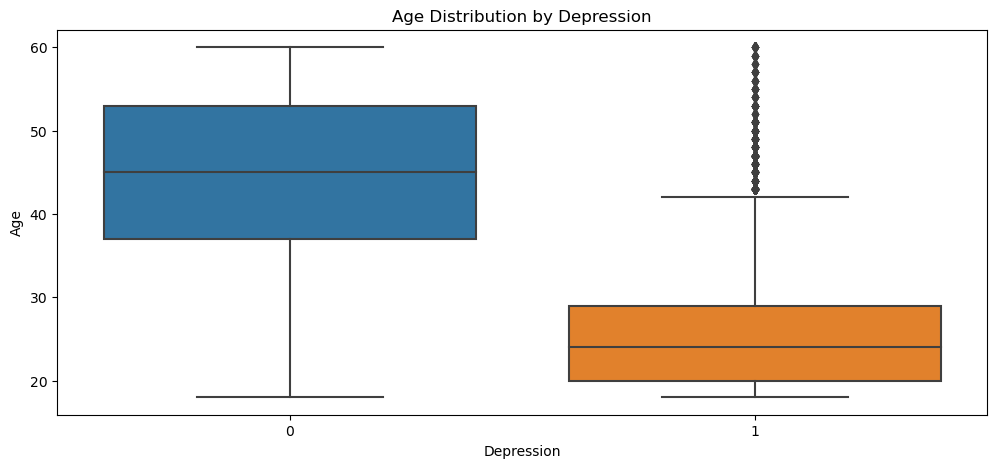

In [5]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Depression', y='Age', data=train_df)
plt.title("Age Distribution by Depression")
plt.show()

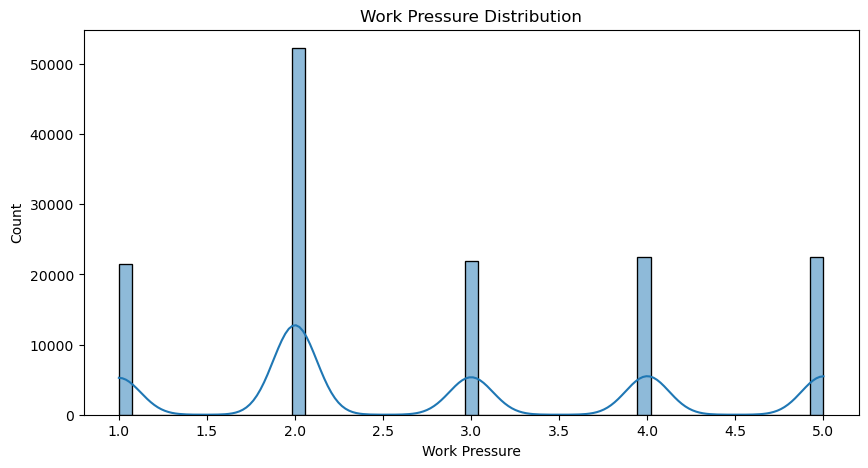

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(train_df['Work Pressure'], kde=True)
plt.title("Work Pressure Distribution")
plt.show()

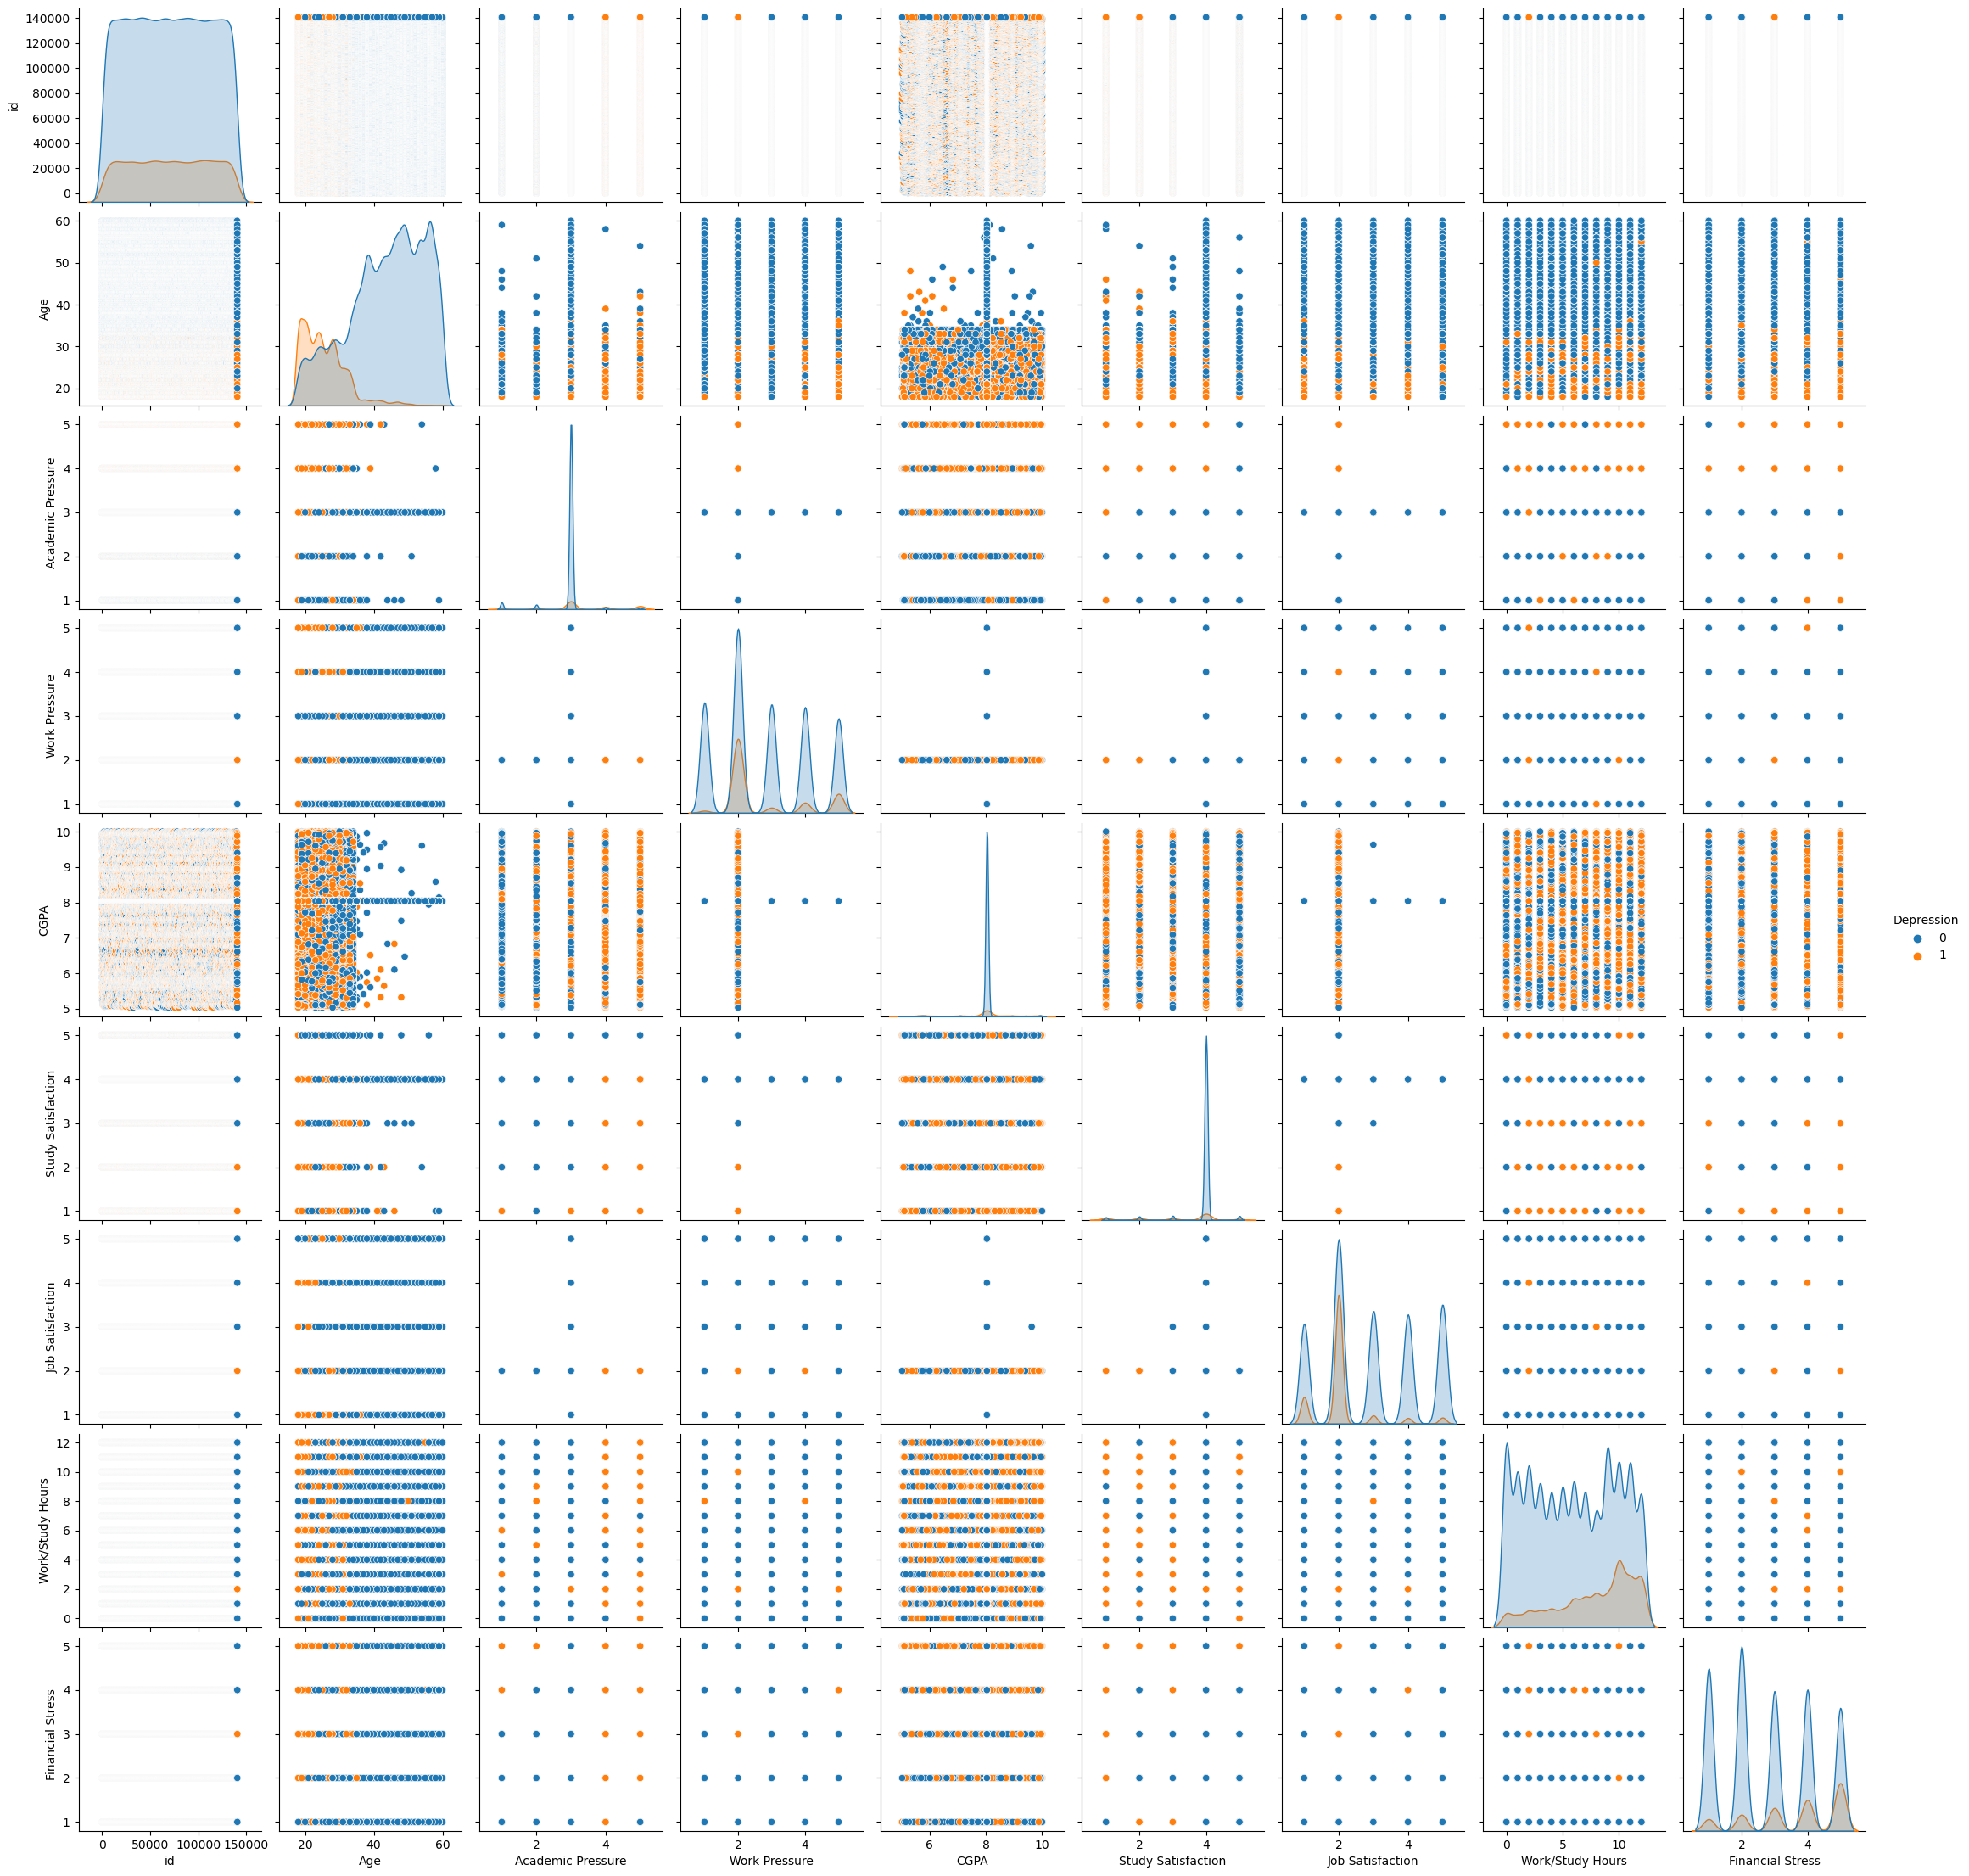

In [7]:
sns.pairplot(train_df, hue='Depression')
plt.show()

In [8]:
### 6. Data Processing

# Encode categorical variables
encoder_dict = {}
categorical_cols = ["Gender", "Working Professional or Student", "Degree", "Sleep Duration", 
                    "Dietary Habits", "Have you ever had suicidal thoughts ?", 
                    "Family History of Mental Illness"]

for col in categorical_cols:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col])  # Fit & Transform on Train
    
    # Store the encoder for use on test data
    encoder_dict[col] = encoder

    # Transform test data, handling unseen labels
    test_df[col] = test_df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])  

In [9]:
### 7. Feature Engineering & Selection

X = train_df.drop(columns=['Depression'])
y = train_df['Depression']

# Feature Selection using RandomForest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
Age                                      0.262838
Have you ever had suicidal thoughts ?    0.109634
Academic Pressure                        0.104920
Working Professional or Student          0.084621
id                                       0.068620
Financial Stress                         0.054182
Work/Study Hours                         0.050391
Degree                                   0.047261
CGPA                                     0.045915
Study Satisfaction                       0.041959
Job Satisfaction                         0.031091
Work Pressure                            0.028720
Sleep Duration                           0.024371
Dietary Habits                           0.023077
Family History of Mental Illness         0.011276
Gender                                   0.011126
dtype: float64


In [10]:
### 8. Model Creation and Evaluation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))

C:\Users\shanu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8873845060412224
Random Forest Accuracy: 0.9361051883439944
Gradient Boosting Accuracy: 0.9378820184790334


In [11]:
### 9. Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

params = {"n_estimators": [100, 200], "max_depth": [3, 5, 7]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 7, 'n_estimators': 100}


In [12]:
### 10. Model Comparison

models = {"Logistic Regression": log_model, "Random Forest": rf_model, "Gradient Boosting": gb_model}
for name, model in models.items():
    acc = accuracy_score(y_val, model.predict(X_val))
    print(f"{name} Accuracy: {acc}")

Logistic Regression Accuracy: 0.8873845060412224
Random Forest Accuracy: 0.9361051883439944
Gradient Boosting Accuracy: 0.9378820184790334


In [13]:
### 11. Final Model Selection

final_model = rf_model  # Selecting RandomForest as the best model

In [14]:
### 12. Save Model as Pickle File

with open("final_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

In [ ]:
### 13. Generate Submission File

# Drop 'id' column if present
test_features = test_df.drop(columns=['id'], errors='ignore')

# Ensure test dataset has the same features as training dataset
common_features = X_train.columns.intersection(test_features.columns)  # Get common columns
test_features = test_features[common_features]  # Keep only matching columns

# If missing columns exist, add them with default values (0 for numerical, mode for categorical)
for col in X_train.columns:
    if col not in test_features.columns:
        if X_train[col].dtype == 'object':  # If categorical, fill with mode
            test_features[col] = X_train[col].mode()[0]
        else:  # If numerical, fill with 0
            test_features[col] = 0

# Reorder columns to exactly match training dataset
test_features = test_features[X_train.columns]

# Make Predictions
test_preds = final_model.predict(test_features)

# Create Submission File
submission = pd.DataFrame({
    "id": test_df["id"],  # Keep original id column
    "Depression": test_preds
})

# Save submission file
submission.to_csv("submissionRF.csv", index=False)
print("Submission file created successfully!")

Submission file created successfully!
